# [Exploration 18] 다양한 OCR모델 비교하기

Google OCR API, keras-ocr, Tesseract 3가지 OCR모델을 비교하는 프로젝트

---

## 프로젝트 목표
---
- 이미지 해상도에 대한 이해
- Bicubic Interpolation, SRGAN으로 실험 후 비교

## 프로젝트 설명
---
1. 검증용 데이터셋 준비
    - 한국어로 검증하기 위해 한국어가 쓰여진 이미지 데이터셋을 구축했습니다.
2. Google OCR API, keras-ocr, Tesseract로 테스트 진행
    - 세 가지 모듈을 활용해 결과를 얻습니다.
3. 테스트 결과 정리
    - 테스트 결과를 시각화를 활용해 정리합니다.
4. 결과 분석과 결론 제시
    - 정리한 결과를 분석하고 활용할 수 있는 서비스를 제안합니다.

## 1. 데이터 불러오기

In [68]:
import os

data_path = os.getenv('HOME')+ '/aiffel/ocr_python/image'
data_path

'/home/aiffel-dj26/aiffel/ocr_python/image'

## 2-1. Google OCR API

In [69]:
def detect_text(path):
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()
    
    with io.open(path, 'rb') as image_file:
        content = image_file.read()
    
    image = vision.Image(content=content)
    
    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    #     for text in texts:
    print('\n"{}"'.format(texts[0].description))
    
    vertices = (['({},{})'.format(vertex.x, vertex.y) for vertex in texts[0].bounding_poly.vertices])
    
    print('bounds: {}'.format(','.join(vertices)))
    
    if response.error.message:
        raise Exception(
        '{}\nFor more info on erroe messages, check:' 
        'https://cloud.google.com/apis/design/errors'.format(
        response.error.message))
    
    return texts[0].description

In [70]:
# 다운받은 google ocr api 인증키 경로 저장 확인
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = os.getenv('HOME') + '/aiffel/ocr_python/my_google_api_key.json'

# 입력 이미지 경로 
file_list = os.listdir(data_path)
file_path = [data_path+'/'+name for name in file_list]
file_path = sorted(file_path)
file_path

-rw-rw-r-- 1 aiffel-dj26 aiffel-dj26 2349  3월 16 10:50 /home/aiffel-dj26/aiffel/ocr_python/my_google_api_key.json


['/home/aiffel-dj26/aiffel/ocr_python/image/0.jpeg',
 '/home/aiffel-dj26/aiffel/ocr_python/image/1.jpg',
 '/home/aiffel-dj26/aiffel/ocr_python/image/2.jpg',
 '/home/aiffel-dj26/aiffel/ocr_python/image/3.jpeg',
 '/home/aiffel-dj26/aiffel/ocr_python/image/4.jpeg',
 '/home/aiffel-dj26/aiffel/ocr_python/image/5.jpg',
 '/home/aiffel-dj26/aiffel/ocr_python/image/6.jpeg',
 '/home/aiffel-dj26/aiffel/ocr_python/image/7.jpg',
 '/home/aiffel-dj26/aiffel/ocr_python/image/8.png',
 '/home/aiffel-dj26/aiffel/ocr_python/image/9.jpg']

In [71]:
# ocr api 함수 호출
google_ocr_result = []
for path in file_path:
    result = detect_text(path)
    google_ocr_result.extend(result)

Texts:

"Gie Coffee Bean,
PARIS BAGUETTE
ARTBOX
banila co.
LUCKY FACTORY
한국일부
"
bounds: (9,8),(305,8),(305,157),(9,157)
Texts:

"How to text in French ? U
Shortcut Meaning
Translation
Bjr
Bonjour
Hello
Slt
Salut
Hi
Pk
Pourquoi
Why
Dsl
Désolé
Sorry
Tkt
T'inquiète (pas) No worries
Mdr
Mort de rire
Lol
Jtm
Je t'aime
I love you
Parlerlafrance
"
bounds: (27,62),(1071,62),(1071,1066),(27,1066)
Texts:

"당선작을
공개합니다!
"
bounds: (135,96),(551,96),(551,291),(135,291)
Texts:

"MAK
N friend should always iundustimale
your Enemy
virtues and an
Oueristimate your Jaudb.
She Gad
"
bounds: (53,8),(294,8),(294,156),(53,156)
Texts:

"soba
N람과 관련된 예쁜 순우리말
사랑옵다
맹김새나 행동이
사랑을 느낄 점도로 귀엽다
"
bounds: (5,3),(187,3),(187,136),(5,136)
Texts:

"화이팅!
힐내세요
"
bounds: (68,113),(570,113),(570,539),(68,539)
Texts:

"아름다운 한국
3.
"
bounds: (50,177),(965,177),(965,512),(50,512)
Texts:

"안다미로
그릇에 넘치도록 많이
"
bounds: (208,114),(492,114),(492,239),(208,239)
Texts:

"SALUT
ADIÓS
HOLA
Hi! bye
HALLO
hei HEI
"
bounds: (156,22),(1003,22)

## 2-2. keras-ocr

In [29]:
import matplotlib.pyplot as plt
import keras_ocr

pipeline = keras_ocr.pipeline.Pipeline()

Looking for /home/aiffel-dj26/.keras-ocr/craft_mlt_25k.h5
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Looking for /home/aiffel-dj26/.keras-ocr/crnn_kurapan.h5


In [77]:
import cv2

In [78]:
image = cv2.imread('https://drive.google.com/drive/u/0/folders/16mdkiDH9JdVuufmjxdqdt_RQ29Tkvn6l')

In [87]:
image_urls = ['https://drive.google.com/uc?id=1L7e_7WDtEHHYz4pKWykOlIiU1whEM8lt',
              'https://drive.google.com/uc?id=12diOJYkBxPbNxjBlvFdEr_o5JUxqNAig',
              'https://drive.google.com/uc?id=1XgNK2oKaP9-rmV9eMWuRavFCAvKt8KbR',
              'https://drive.google.com/uc?id=1xd4VEXMxltmX6WvCL18jictvTzJP2G0J',
              'https://drive.google.com/uc?id=1B2Ntq8Q8-SBfJaJ7ns0tZCqTMGECVjtJ',
              'https://drive.google.com/uc?id=1YM17G5zCOndt_bP59SP9YG6QMA2EXr6F',
              'https://drive.google.com/uc?id=1pdjMwxv62F-JIVjT-mfFUQTLtRdgkwOO',
              'https://drive.google.com/uc?id=13SP7G1Df0OWPb35r47eB_oYjJEF55sbH',
              'https://drive.google.com/uc?id=1AzWuX6IkpZczoDlztDg7uZ-7EV-XP9v-',
              'https://drive.google.com/uc?id=1RG8TZciXLH5k_gl0NvLp40FAGLNfcU_1']
             

images = [keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize({url}) for url in image_urls]

- 시각화해보기

/home/aiffel-dj26/anaconda3/envs/aiffel/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


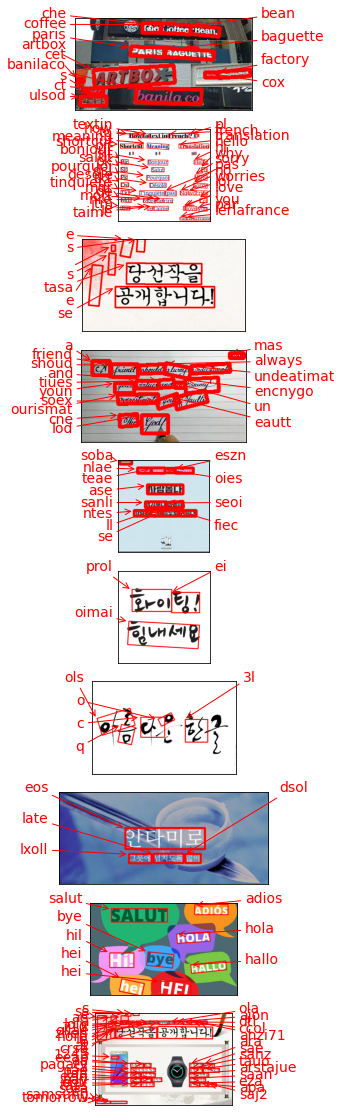

In [88]:
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx],
                                   predictions=prediction_groups[idx][0], ax=ax)

## 2-3. Tesseract

In [102]:
import pytesseract
from PIL import Image
from pytesseract import Output

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output', lang='kor'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem3 --psm 3'
    image = Image.open(image_path)
    
    recognized_data = pytesseract.image_to_data(
        image, lang=lang,
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
        
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
        
    return cropped_image_path_list
    
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/tesseract'
    
    
tesseract_result_path = []
for path in file_path:
    cropped_image_path_list = crop_word_regions(image_path=path, output_path=work_dir)
    tesseract_result_path.extend(cropped_image_path_list)

- 실제 이미지와 tesseract가 인식한 단어를 비교해봅니다.

In [96]:
tesseract_result_path

['/home/aiffel-dj26/aiffel/ocr_pthon/0000.png',
 '/home/aiffel-dj26/aiffel/ocr_pthon/0000.png',
 '/home/aiffel-dj26/aiffel/ocr_pthon/0001.png',
 '/home/aiffel-dj26/aiffel/ocr_pthon/0002.png',
 '/home/aiffel-dj26/aiffel/ocr_pthon/0003.png',
 '/home/aiffel-dj26/aiffel/ocr_pthon/0004.png',
 '/home/aiffel-dj26/aiffel/ocr_pthon/0005.png',
 '/home/aiffel-dj26/aiffel/ocr_pthon/0006.png',
 '/home/aiffel-dj26/aiffel/ocr_pthon/0007.png',
 '/home/aiffel-dj26/aiffel/ocr_pthon/0008.png',
 '/home/aiffel-dj26/aiffel/ocr_pthon/0009.png',
 '/home/aiffel-dj26/aiffel/ocr_pthon/0010.png',
 '/home/aiffel-dj26/aiffel/ocr_pthon/0011.png',
 '/home/aiffel-dj26/aiffel/ocr_pthon/0012.png',
 '/home/aiffel-dj26/aiffel/ocr_pthon/0013.png',
 '/home/aiffel-dj26/aiffel/ocr_pthon/0014.png',
 '/home/aiffel-dj26/aiffel/ocr_pthon/0015.png',
 '/home/aiffel-dj26/aiffel/ocr_pthon/0016.png',
 '/home/aiffel-dj26/aiffel/ocr_pthon/0017.png',
 '/home/aiffel-dj26/aiffel/ocr_pthon/0018.png',
 '/home/aiffel-dj26/aiffel/ocr_pthon/001

In [101]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r' --oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='kor',
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print('Done')

for cropped_path in tesseract_result_path:
    recognize_images(tesseract_result_path)
#     print(cropped_path)

「

「

/

|어

에

스투

 190 ' [~


샐럭ㅅ

| 노트

파이브'

 190 ' [~

순우

리

말

이름

지으면

맛있는

너

[)

| 생긴다?!

등

>

직응

 190 ' [~

긍

24

항

니

디

|


0 개

.득.

지기

디

1

커

시.

머리

핑찌

글

2

리리

 190 ' [~

디니

디

1

머

럼

코리

ㅜ

리

따

망

0

「

「

/

|어

에

스투

 190 ' [~


샐럭ㅅ

| 노트

파이브'

 190 ' [~

순우

「

/

|어

에

스투

 190 ' [~


샐럭ㅅ

| 노트

파이브'

 190 ' [~

순우

리

말

이름

지으면

맛있는

너

[)

| 생긴다?!

등

>

직응

 190 ' [~

긍

24

항

니

「

/

|어

에

스투

「

/

|어

에

스투

 190 ' [~

「

「

「

/

|어

에

스투

 190 ' [~


샐럭ㅅ

| 노트

파이브'

 190 ' [~

순우

리

말

이름

지으면

맛있는

너

[)

| 생긴다?!

등

>

직응

 190 ' [~

긍

24

항

니

디

|


0 개

.득.

지기

디

1

커

시.

머리

핑찌

글

2

리리

 190 ' [~

디니

디

1

머

럼

코리

ㅜ

리

따

망

0

|

리

떨

모은

디

로그

넬

Ｌ

오

너

ㅁ2|

9]

들

2

리

4

디

1

1

나

2|

|

또

꺼

.득.

니 -온

0

히스

스 점


이름

지으면

맛있는

너

[)

| 생긴다?!

등

>

직응

 190 ' [~

긍

24

항

니

디

|


0 개

.득.

지기

디

1

커

시.

머리

핑찌

글

2

리리

 190 ' [~

디니

디

1

머

럼

코리

ㅜ

리

따

망

0

|

리

떨

모은

디

로그

넬

Ｌ

오

너

ㅁ2|

9]

들

2

리

4

디

1

1

나

2|

|

또

꺼

.득.

니 -온

0

히스

스 점

0

호

2

러

리.

시간

펄- ×

|

7

는:

도:

자 1<

나

』

~

Done
「

「

/

|어

에

스투

 190 ' [~


샐럭ㅅ

| 노트

파이브'

 190 ' [~

순우

리

말

이름

지으면

맛있는

너

[)

| 생긴다?!

등

>

직응

 190 ' [~

긍

24

항

니

디

|


0 개

.득.

지기

디

1

커

시.

머리

핑찌

글

2

리리

 190 ' [~

디니

디

1

머

럼

코리

ㅜ

리

따

망

0

「

「

/

|어

에

스투

 190 ' [~


샐럭ㅅ

| 노트

파이브'

 190 ' [~

순우

「

/

|어

에

스투

 190 ' [~


샐럭ㅅ

| 노트

파이브'

 190 ' [~

순우

리

말

이름

지으면

맛있는

너

[)

| 생긴다?!

등

>

직응

 190 ' [~

긍

24

항

니

「

/

|어

에

스투

「

/

|어

에

스투

 190 ' [~

「

「

「



KeyboardInterrupt: 

# 루브릭 평가
---
1. **OCR을 활용하여 구현하려는 서비스의 기획이 타당한가?**   

    - 목표로 하는 서비스가 OCR를 적용 가능하며, OCR을 활용했을 때 더욱 유용해진다. 


2. **모델 평가기준이 명확하고 체계적으로 세워졌는가?**

    - 평가 기준에 부합하는 테스트 데이터의 특징이 무엇인지 명확하게 제시되었다.
     
     
3. **평가기준에 따라 충분한 분량의 테스트가 진행되고 그 결과가 잘 정리되었는가?** 

    - 최대 20장까지의 테스트 이미지를 사용해 제시된 평가 기준에 따른 테스트 결과가 잘 정리되어 결론이 도출되었다.

    
    
# 회고
---
## 어려웠던 점 
- 데이터셋
    - 영화 데이터를 세션을 기준으로 추천한다는 부분이 이해가 가지 않아서, 제 해석대로 프로젝트를 진행하다보니 시간이 많이 지체된 점이 있었습니다.

- session
    - 예제의 쇼핑 데이터에서는 세션에 대한 이해가 쉬웠지만 영화 리뷰 데이터로 대입을 하니 다시 이해가 잘 가지 않았습니다..

## 다짐
- 본 프로젝트에서는 세션을 기준으로 추천시스템을 구성하는 흐름에 대해서 이해를 하는 것이 목표인데, 데이터셋에 집착을 하는 바람에 데이터셋에 대해 고민은 충분하게 할 수 있었지만 프로젝트 수행에 있어서 만족스럽지 않았습니다. 해당 프로젝트에 대해서는 다시 공부해야겠습니다! 아자!